<div align="center">
    <img src="https://logoyab.com/wp-content/uploads/2024/08/IUST-University-Logo-1030x1030.png" alt="Logo" width="200">
    <p><b>HW1 @ Deep Learning Course, Dr. Mohammadi</b></p>
    <p><b>ِDesinged by Nafiseh Ahmadi</b></p>
</div>

--------


*Full Name:*

*Student Number:*


------


## 0. Computer vision libraries in PyTorch

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.


In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

## 1. Getting a dataset

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [ ]:
# Setup training data
# START TODO ################

# END TODO ################


# Setup testing data
# START TODO ################

# END TODO ################

Let's check out the first sample of the training data.

In [4]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Input and output shapes of a computer vision model

We've got a big tensor of values (the image) leading to a single value for the target (the label).

Let's see the image shape.

In [ ]:
# What's the shape of the image?
# START TODO ################

# END TODO ################

The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.

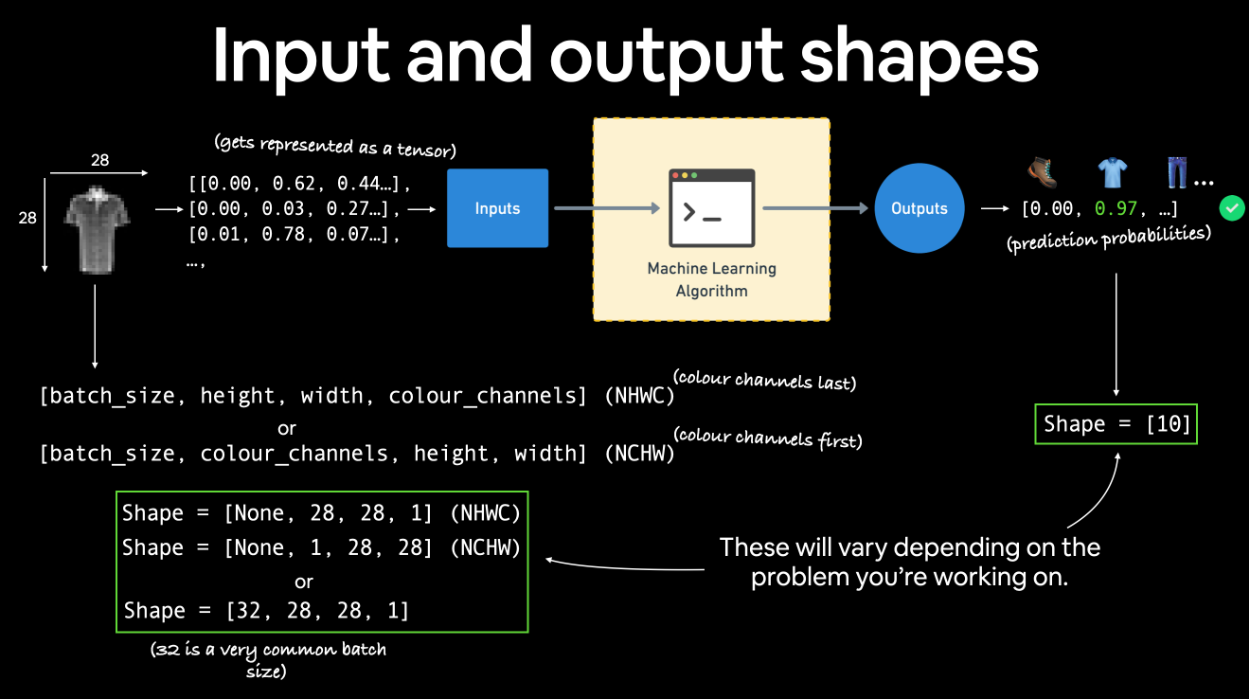
*Various problems will have various input and output shapes. But the premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.*

If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known as the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`. We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

However, PyTorch also explains that `NHWC` (channels last) performs better and is [considered best practice](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

Let's check out more shapes of our data.

In [ ]:
# How many samples are there?
# START TODO ################

# END TODO ################

What classes are there?

In [ ]:
# See classes
# START TODO ################

# END TODO ################
class_names

we're working with 10 different classes, it means our problem is **multi-class classification**.

Let's get visual.

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


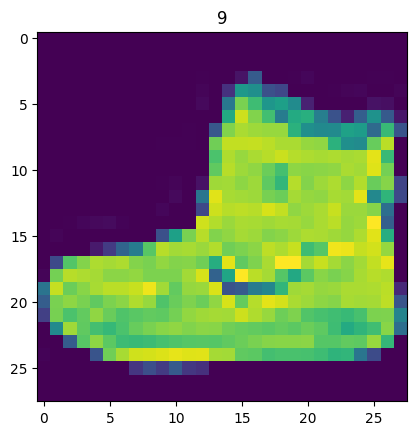

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

We can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`.

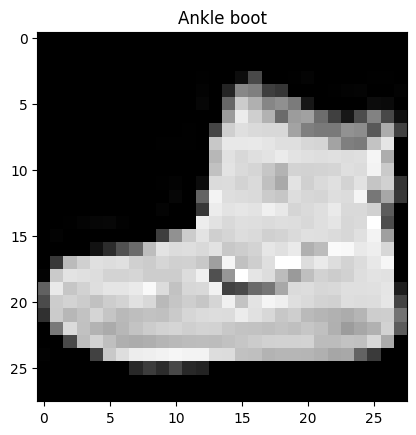

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Beautiful, well as beautiful as a pixelated grayscale ankle boot can get.

Let's view a few more.

In [ ]:
# Plot more images
# START TODO ################

# END TODO ################

## 2. Prepare DataLoader

Now we've got a dataset ready to go.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` does what you think it might do.

It helps load data into a model.

For training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.*

Let's create `DataLoader`'s for our training and test sets.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = #TODO

# Turn datasets(train & test) into iterables (batches)
# START TODO ################
#NOTE: don't necessarily have to shuffle the testing data
# END TODO ################

# Let's check out What you have created
# START TODO ################

# END TODO ################

And we can see that the data remains unchanged by checking a single sample.

In [ ]:
# Show a sample
# START TODO ################

# END TODO ################

## 3. Model 0: Build a baseline model

Data loaded and prepared!

Time to build a **baseline model** by subclassing `nn.Module`.

A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Baseline model will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

This is easier to understand when you see it.

**Keep in mind that you must use Tensorboard to draw the necessary graphs.**

In [ ]:
# Create a flatten layer
flatten_model = #TODO

# Get a single sample
x = #TODO

# Flatten the sample
# perform forward pass
output = #TODO

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

**Question:** The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Why do this?

**Your Answer:** #TODO


Let's create our first model using `nn.Flatten()` as the first layer with two Linner Layer.

In [ ]:
from torch import nn
class FashionMNISTModel(nn.Module):
# START TODO ################

# END TODO ################

Wonderful!

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:
* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (you'll run a small test for running `model_0` on CPU vs. a similar model on GPU soon).

In [ ]:
torch.manual_seed(42)
# START TODO ################

model_0 = # setup model with input parameters
# keep model on CPU to begin with
# TODO

# END TODO ################

### 3.1 Setup loss, optimizer and evaluation metrics


#### 3.1.1 Cross Entropy Loss

The cross-entropy loss is a popular loss function used in multi-class classification problems. It measures the dissimilarity between the true labels and the predicted probabilities for each class.

In [ ]:
# START TODO ################
def loss_function(Y_predicted, Y_real):
    """
    Implementation of Cross-Entropy Loss.

    Args:
        Y_predicted (torch.Tensor): Predicted probabilities (logits) of shape (batch_size, num_classes).
        Y_real (torch.Tensor): True labels (class indices) of shape (batch_size,).

    Returns:
        torch.Tensor: Computed cross-entropy loss.
    """
# END TODO###################

#### 3.1.2 SGD+Momentum

Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent.

Implement the SGD+momentum update rule in the function `sgd_momentum`.

**Question:**
How does the behavior of the optimization process, specifically the trajectory through the loss landscape, differ when using Stochastic Gradient Descent (SGD) with momentum compared to using vanilla SGD?

**Your Answer:** #TODO

In [ ]:
# START TODO ################
def sgd_momentum(w, dw, config=None):
    """
    Performs Stochastic Gradient Descent (SGD) with Momentum.

    Args:
        w (torch.Tensor): Current weights.
        dw (torch.Tensor): Gradient of the weights.
        config (dict, optional): Configuration dictionary containing:
            - 'learning_rate' (float): Learning rate for the update.
            - 'momentum' (float): Momentum factor.
            - 'velocity' (torch.Tensor): Previous velocity (initialized as zero tensor).

    Returns:
        torch.Tensor: Updated weights.
        dict: Updated configuration dictionary with updated velocity.
    """
# END TODO###################

#### 3.1.3 Accuracy

In [ ]:
# Import accuracy metric

# START TODO ################
# Note: could use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)
# END TODO###################

### 3.2 Creating a function to time our experiments

Loss function and optimizer ready!

It's time to start training a model.

But how about we do a little experiment while we train.

I mean, let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the [`timeit.default_timer()` function](https://docs.python.org/3/library/timeit.html#timeit.default_timer) from the Python [`timeit` module](https://docs.python.org/3/library/timeit.html).

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

Looks like we've got all of the pieces of the puzzle ready to go, a timer, a loss function, an optimizer, a model and most importantly, some data.

Let's now create a training loop and a testing loop to train and evaluate our model.

Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

Let's step through it:
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

A fair few steps but...

...if in doubt, code it out.

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# START TODO ################

# Set the number of epochs (we'll keep this small for faster training times)
epochs = #TODO

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for #TODO:
        model_0.train()
        # 1. Forward pass
        # TODO

        # 2. Calculate loss (per batch)
        # TODO

        # 3. Optimizer zero grad
        # TODO

        # 4. Loss backward
        # TODO

        # 5. Optimizer step
        # TODO

        # Print out how many samples have been seen
        # TODO

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    # TODO

# END TODO###################

# START TODO ################
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for #TODO:
            # 1. Forward pass
            #TODO

            # 2. Calculate loss (accumulatively)
            #TODO

            # 3. Calculate accuracy (preds need to be same as y_true)
            #TODO

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        #TODO
        # Divide total accuracy by length of test dataloader (per batch)
        #TODO
# END TODO###################

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

## 4. Make predictions and get Model 0 results

let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [ ]:
# Set the seed and start the timer
# START TODO ################

# END TODO ################

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            #TODO

            # Accumulate the loss and accuracy values per batch
            #TODO

        # Scale loss and acc to find the average loss/acc per batch
        #TODO

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model0 results on test dataset
model_0_results = #TODO

model_0_results

## 5. Setup device agnostic-code (for using a GPU if there is one)
We've seen how long it takes to train ma PyTorch model on 60,000 samples on CPU.

> **Note:** Model training time is dependent on hardware used. Generally, more processors means faster training and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) for our models and data to run on GPU if it's available.

If you're running this notebook on Google Colab, and you don't have a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going `Runtime -> Run before`.

In [ ]:
# Setup device agnostic code
# START TODO ################

# END TODO ################

Let's build another model.

## 6.Implement the Activation Functions

**Why Non-Linear Activations?**  
The function shown is composed of linear pieces (piecewise linear). The slope is consistent during the linear portion and then changes abruptly at transition points. At transition points, a new linear function is added which, when added to the existing function, will produce the new slope. The new function is added at transition point but does not contribute to the output prior to that point. The non-linear activation function is responsible for disabling the input prior to and sometimes after the transition points. The following exercise provides a more tangible example.

### 6.1 Relu




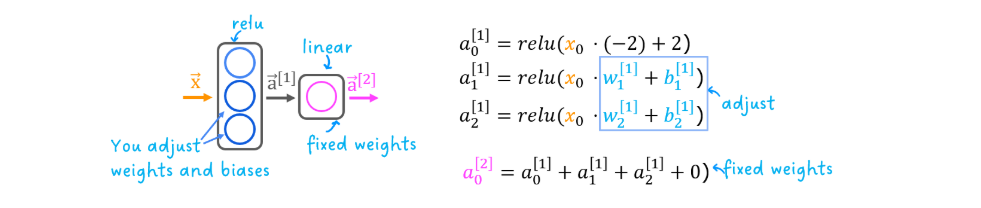

In [ ]:
def relu(self, x, derivative=False):
    """
    Compute the Relu function for the input.

    Args:
        x (float or np.ndarray): Input to the ReLU function.

    Returns:
        float or np.ndarray: Output after applying ReLU.
    """
    # START TODO ################

    # END TODO ################

### 6.2 Sigmoid

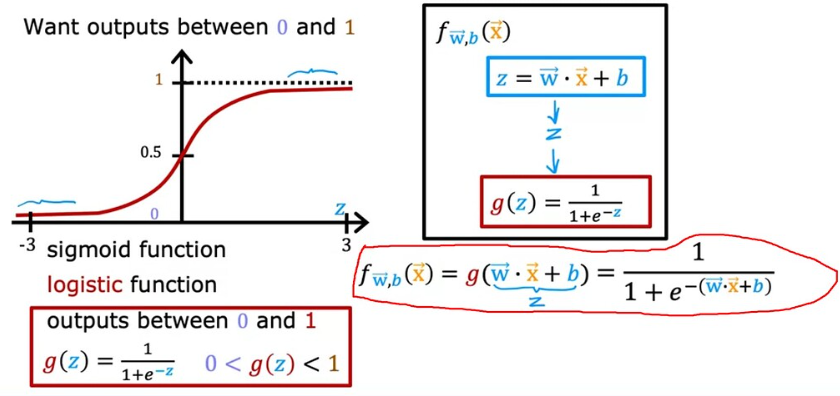

In [ ]:
def sigmoid(x):
    """
    Compute the sigmoid function for the input.

    Args:
        x (numpy float array):

    Returns:
        A numpy float array containing sigmoid results
    """
    # START TODO ################

    # START TODO ################

### 6.3 Softmax

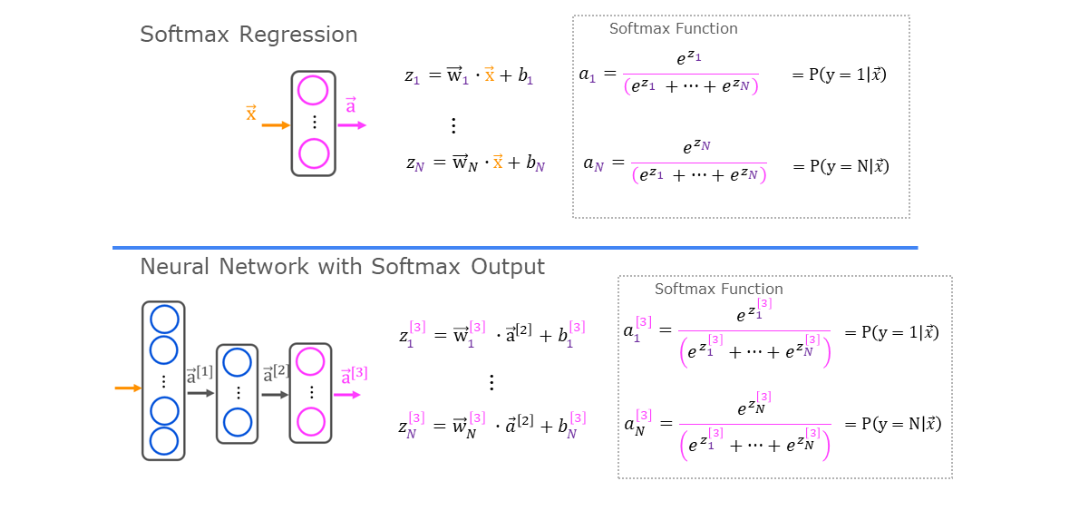

In [ ]:
def softmax(x):
    """
    Compute softmax function for a batch of input values.
    First dim of the input: batch size.
    Second dim of the input: prob of every class in the output.
    Only sum over the second dim.

    Important: Avoid overflow for this function. It overflows for very big numbers like e^10000.

    Args:
        x : 2d numpy float array (batch_size , number_of_classes)

    Returns:
        2d numpy float array containing softmax results (batch_size, number_of_classes)
    """
    # START TODO ################
    # Apply a stability trick to avoid overflow
    # END TODO###################

## 7. Model 1: Building a model with non-linearity

**Question:** Seeing the data we've been working with, do you think it needs non-linear functions?(Provide your analysis.)

**Your Answer:** #TODO

In [ ]:
# Create a model with non-linear layers
class FashionMNISTModel_1():
# START TODO ################
# Construct a nonlinear model that fits the dataset, ensuring appropriate activation functions in the hidden and output layers
# END TODO ################

That looks good.

Now let's instantiate it with the same settings we used before.

We'll need `input_shape=784` (equal to the number of features of our image data), `hidden_units=10` (starting small and the same as our baseline model) and `output_shape=len(class_names)` (one output unit per class).

> **Note:** Notice how we kept most of the settings of our model the same except for one change: adding non-linear layers. This is a standard practice for running a series of machine learning experiments, change one thing and see what happens, then do it again, again, again.

In [ ]:
torch.manual_seed(42)
# START TODO ################
model_1 = # send model to GPU if it's available
# END TODO ################
next(model_1.parameters()).device # check model device

### 7.1 Setup loss, optimizer and evaluation metrics

In [ ]:
# Compute loss function and optimizer
# START TODO ################

# END TODO###################

### 7.2 Functionizing training and test loops

So far we've been writing train and test loops over and over.

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

> **Note:** Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [ ]:
# START TODO ################
# Implement the train_step() function.
    # Use the GPU
    # output= print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
# END TODO###################

# START TODO ################
# Implement the test_step() function.
    # Use the GPU
    # output= print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
# END TODO###################

Woohoo!

Now we've got some functions for training and testing our model, let's run them.

We'll do so inside another loop for each epoch.

That way, for each epoch, we're going through a training step and a testing step.

> **Note:** You can customize how often you do a testing step. Sometimes people do them every five epochs or 10 epochs or in our case, every epoch.

Let's also time things to see how long our code takes to run on the GPU.

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# START TODO ################
# training and testing on model1
# for each epoch, we're going through a training step and a testing step.
# END TODO ################

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

Our model trained but the training time took longer?

> **Note:** The training time on CUDA vs CPU will depend largely on the quality of the CPU/GPU you're using.

> **Question:** "I used a GPU but my model didn't train faster, why might that be?"
>
> **Answer:** Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.
>
> There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.
>
> So for smaller models and datasets, the CPU might actually be the optimal place to compute on.
>
> But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.
>
> However, this is largely dependent on the hardware you're using. With practice, you will get used to where the best place to train your models is.

Let's evaluate our trained `model_1` using our `eval_model()` function and see how it went.

In [ ]:
torch.manual_seed(42)

model_1_results = eval_model(model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_1_results

Oh no!

It looks like our `eval_model()` function errors out with:

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

It's because we've setup our data and model to use device-agnostic code but not our evaluation function.

How about we fix that by passing a target `device` parameter to our `eval_model()` function?

In [ ]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    # START TODO ################

    # END TODO ################

# Calculate model 1 results with device-agnostic code
model_1_results = #TODO
model_1_results

In [ ]:
# Check baseline results
model_0_results

Woah, in this case, it looks like adding non-linearities to our model made it perform worse than the baseline!

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.

It seems like our model is **overfitting** on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

## 8. Regularization

The core idea in Regularization is to keep more important features and ignore unimportant ones. The importance of feature is measured by the value of its parameter θj.

In linear regression, we modify its cost function by adding regularization term. The value of θj is controlled by regularization parameter λ. Note that m is the number of data and n is the number of features(parameters.

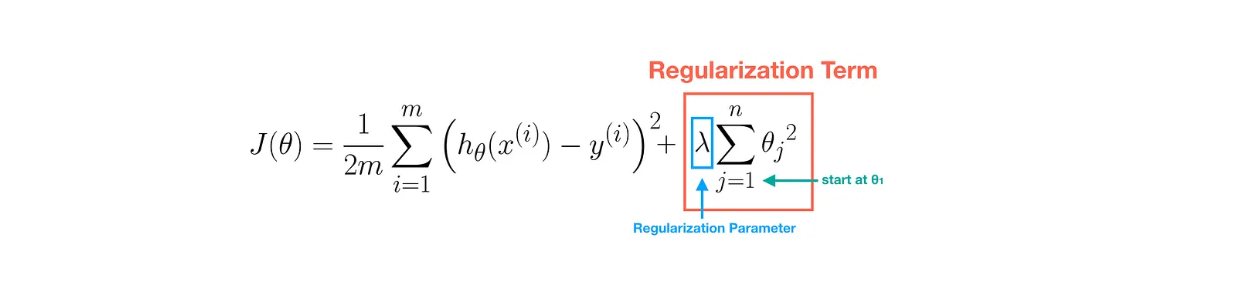

For instance, if we want to get a better model instead of the overfitting one. Obviously, we don’t need features X³ and X⁴ since they are unimportant. The procedure describes below.

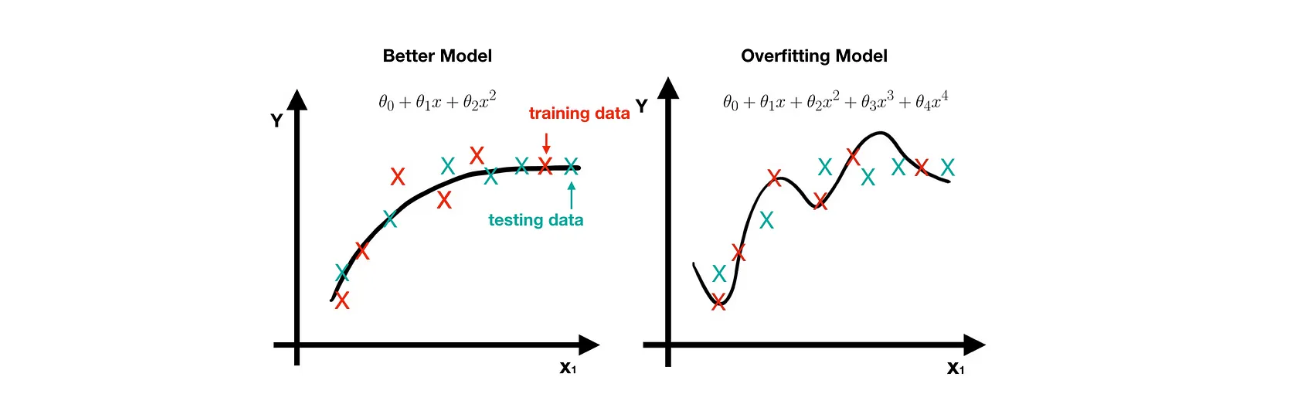

First, we modify the Cost Function J(θ) by adding regularization. Second, apply gradient descent in order to minimize J(θ) and get the values of θ3 and θ4. After the minimize procedure, the values of θ3 and θ4 must be near to zero if λ=1000.

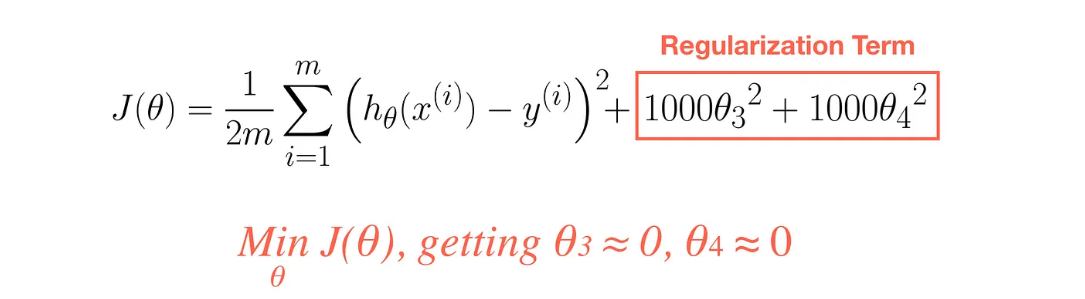

**Regularization Parameter λ**

If λ is too large, then all the values of θ may be near to zero and this may cause Underfitting. In other words, this model has both large training error and large prediction error. (Note that the regularization term starts from θ1)
If λ is zero or too small, its effect on parameters θ is little. This may cause Overfitting.

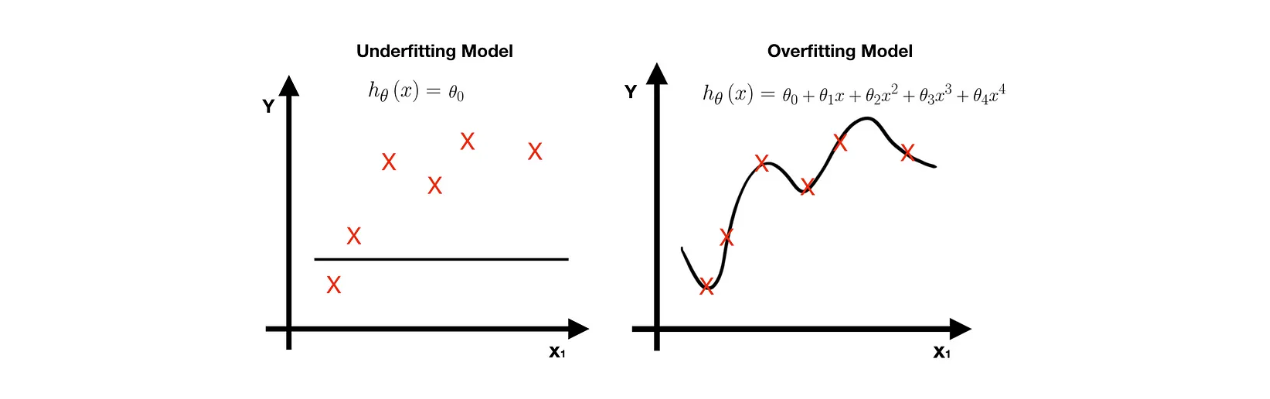

### 8.1 Build a regularized model

In [ ]:
# START TODO ################
# Incorporate regularization into the model from Section 7 and define Model_2.

# END TODO ################

In [ ]:
# Compute loss function and optimizer
# START TODO ################

# END TODO###################

In [ ]:
# Compute train_step() and test_step() with GPU
# START TODO ################

# END TODO###################

In [ ]:
# Evaluation model_2
# START TODO ################

# END TODO###################

## 9. Compare models

In [ ]:
# START TODO ################

# Compare the Three Models by Plotting the Loss Curve.

# END TODO###################